we will use a framework for quantum computing known as "Qiskit patterns", which breaks workflows into the following steps:

Step 1: Map classical inputs to a quantum problem \
Step 2: Optimize problem for quantum execution \
Step 3: Execute using Qiskit Runtime Primitives \
Step 4: Post-processing and classical analysis 

In [1]:
import random
from numpy import pi
import numpy as np

#normalized arbitrary state vector.
a=2
b=(1+1j)
norm=np.sqrt(a*np.conjugate(a)+b*np.conjugate(b))
a=a/norm
b=b/norm
print(a,b)

(0.8164965809277261+0j) (0.4082482904638631+0.4082482904638631j)


In [22]:
#for random
a=random.random()
b=random.random()
norm=np.sqrt(a*np.conjugate(a)+b*np.conjugate(b))
a=a/norm
b=b/norm
print(a,b)

0.6059881973277876 0.7954736354521238


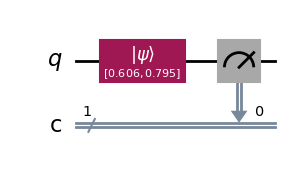

In [23]:
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit, Parameter

#Define Registers.
qr=QuantumRegister(1,'q')
cr=ClassicalRegister(1,'c')
qc=QuantumCircuit(qr,cr)
qc.initialize([a,b])
qc.measure(0,0)
qc.draw('mpl')


In [24]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR-API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')
 
# Syntax for specifying a channel and instance (if you need to change from the default set above)
# service = QiskitRuntimeService(channel='<channel name here>', instance="<your instance name here>")
 
# Load saved credentials
service = QiskitRuntimeService()

In [25]:
# Load the Runtime primitive and session
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
 
# Use the least busy backend, specify options as needed
# backend = service.least_busy(operational=True, simulator=False, min_num_qubits = 127)
backend = service.least_busy()
print(backend.name)

ibm_fez


In [26]:
## Use a local simulator if you don't have any more time available on your account, you can also choose to run this on a simulator instead. Just uncomment the code and run the cell below to do so
 
from qiskit_aer import AerSimulator
 
## Generate a simulator that mimics the real quantum system
 
backend_sim = AerSimulator.from_backend(backend)
 
## Import an estimator, this time from qiskit (we will import from Runtime for real hardware)
 
from qiskit.primitives import BackendSamplerV2
sampler_sim = BackendSamplerV2(backend = backend_sim)
from qiskit.primitives import BackendEstimatorV2
estimator_sim = BackendEstimatorV2(backend = backend_sim)

In [27]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
qc_ibm = pm.run(qc)

In [28]:
# Specify that we want to use only a single shot, to represent a single measurement of a spin in a SG device.
#num_shots = 1
 
# Evaluate the problem using a QPU via Qiskit IBM Runtime
# The best practice is to use a session as shown below. This is available to Premium Plan, Flex Plan, and On-Prem (IBM Quantum Platform API) Plan users.
#with Session(backend=backend) as session:
 #   sampler = Sampler(mode=session)
   # dist = sampler.run([qc_ibm], shots=num_shots).result()
#session.close()
#counts = dist[0].data.c.get_counts()
 
# Open users can still carry out this experiment, but without making use of a session, meaning repeated queuing is possible.
# from qiskit_ibm_runtime import Batch,
# batch = Batch(backend=backend)
# sampler = Sampler(mode=batch)
# dist = sampler.run([qc_ibm], shots=num_shots).result()
# Close the batch because no context manager was used.
# batch.close()
# counts = dist[0].data.c.get_counts()

In [29]:
# This uses a local simulator
from qiskit_aer import AerSimulator
 
# This generates a simulator that mimics the real quantum system
backend_sim = AerSimulator.from_backend(backend)
 
# Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSamplerV2
sampler = BackendSamplerV2(backend = backend_sim)
 
num_shots = 1
 
# This runs the job
dist = sampler.run([qc_ibm], shots = num_shots).result()
 
# This selects measurement counts for the 0th circuit, which in this case is the only circuit
counts=dist[0].data.c.get_counts()

counts =  {'1': 1}


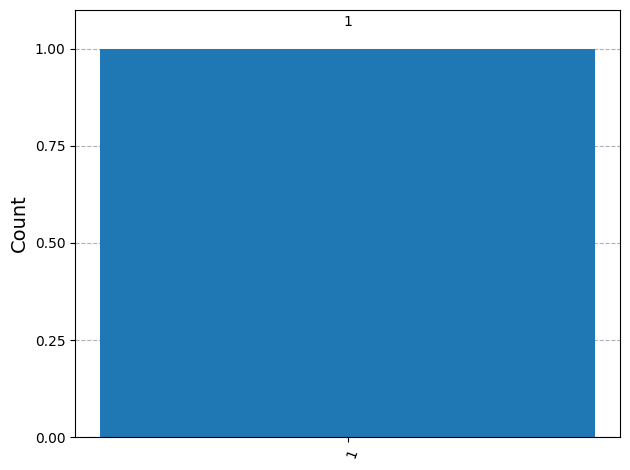

In [30]:
from qiskit.visualization import plot_histogram
 
print("counts = ", counts)
plot_histogram(counts)

Second experiment: Measuring many particles
To gather statistics on many such measurements, we don't need to repeat steps 1 & 2. We can simply increase the number of shots in our experiment. Feel free to play with the number of shots in the instance of step 3 below.

In [31]:
#from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
 
#num_shots = 100
 
# Evaluate the problem using a QPU via Qiskit IBM Runtime
# The best practice is to use a session as shown below. This is available to Premium Plan, Flex Plan, and On-Prem (IBM Quantum Platform API) Plan users.
#with Session(backend=backend) as session:
  #  sampler = Sampler(mode=session)
   # dist = sampler.run([qc_ibm], shots=num_shots).result()
#session.close()
#counts = dist[0].data.c.get_counts()
 
# Open users can still carry out this experiment, but without making use of a session, meaning repeated queuing is possible.
# batch = Batch(backend=backend)
# sampler = Sampler(mode=batch)
# dist = sampler.run([qc_ibm], shots=num_shots).result()
# Close the batch because no context manager was used.
# batch.close()
# counts = dist[0].data.c.get_counts()

In [32]:
# This uses a local simulator
from qiskit_aer import AerSimulator
 
# This generates a simulator that mimics the real quantum system
backend_sim = AerSimulator.from_backend(backend)
 
# Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSamplerV2
sampler = BackendSamplerV2(backend = backend_sim)
 
num_shots = 100
 
 
# This runs the job
dist = sampler.run([qc_ibm], shots = num_shots).result()
 
# This selects measurement counts for the 0th circuit, which in this case is the only circuit
counts=dist[0].data.c.get_counts()

counts =  {'1': 60, '0': 40}


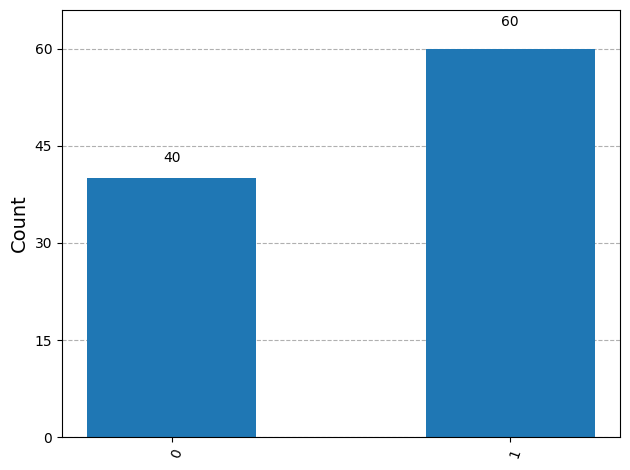

In [33]:
from qiskit.visualization import plot_histogram
 
print("counts = ", counts)
plot_histogram(counts)

Third experiment: Random spins in an oven
In the Stern-Gerlach experiment, the researchers didn't get to specify an angle at which an angular momentum vector would emerge from the oven. The orientations were random (or something even more mysterious! See the Qiskit Classroom module on Bell's theorem). A reasonable analog of that experiment would be for us to randomly initialize the states of our qubit and make measurements many times.

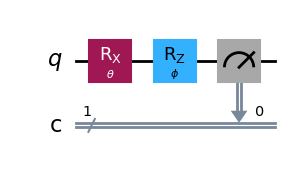

In [38]:
theta=Parameter('$\\theta$')
phi=Parameter('$\\phi$')

qr=QuantumRegister(1,'q')
cr=ClassicalRegister(1,'c')
qc=QuantumCircuit(qr,cr)

qc.rx(theta,0)
qc.rz(phi,0)
qc.measure(0,0)

qc.draw('mpl')

In [39]:
# This uses a local simulator
from qiskit_aer import AerSimulator
 
# Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSamplerV2
 
# This generates a simulator that mimics the real quantum system
backend_sim = AerSimulator.from_backend(backend)
sampler_sim = BackendSamplerV2(backend=backend_sim)
 
# from qiskit.primitives import BackendSamplerV2
# sampler = BackendSamplerV2(backend=backend)

In [ ]:
# A list to store the accumulated probabilities of the two possible measurement outcomes.
probslist = {"0": 0.0, "1": 0.0}
 
# Choose how many "particles"/measurements
measurements = 100
num_shots = 1
 
for i in range(measurements):
    # Assign a random orientation for each measurement
    phi = random.random() * 2 * pi
    theta = random.random() * 2 * pi
 
    angles = [phi, theta]
    circuit = qc.assign_parameters(angles)
    qc_ibm = pm.run(circuit)
 
    # Run the circuit
    # job = sampler.run([circuit],num_shots = 1)
    dist = sampler_sim.run([qc_ibm], shots=num_shots).result()
 
    # Update the list of probabilities
    zeroterm = dist[0].data.c.get_counts().get("0") or 0 #.get("0") measures number of times zero was measured
    oneterm = dist[0].data.c.get_counts().get("1") or 0
    probslist.update({"0": probslist.get("0") + zeroterm})
    probslist.update({"1": probslist.get("1") + oneterm})
 
probslist.update({"0": probslist.get("0") / measurements})
probslist.update({"1": probslist.get("1") / measurements})
# print(probslist)

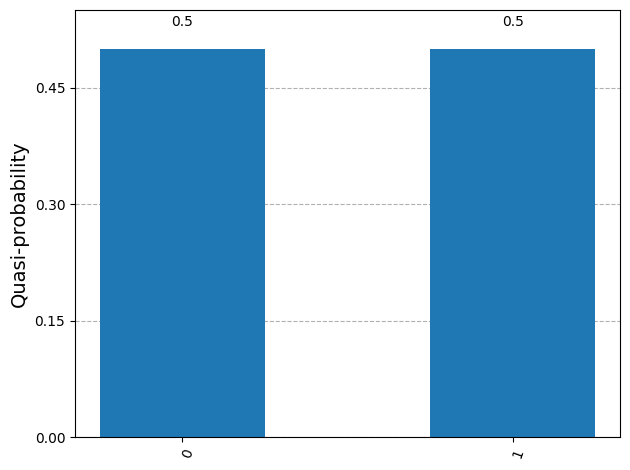

In [46]:
plot_histogram(probslist)

# Fourth experiment: Repeated measurements

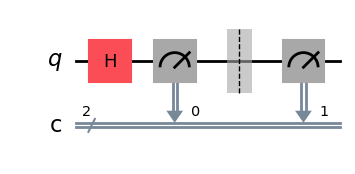

In [48]:
from qiskit import QuantumCircuit
qr=QuantumRegister(1,"q")
cr=ClassicalRegister(2,"c")
qc=QuantumCircuit(qr,cr)

qc.h(0)

# First Measurement
qc.measure(0,0)
qc.barrier()

# Second Measurement
qc.measure(0,1)

qc.draw('mpl')



In [49]:
qc_ibm=pm.run(qc)

In [50]:
# Step 3: Run the job
 
num_shots = 1000
#dist = sampler.run([qc_ibm], shots=num_shots).result()
# To run on a simulator, uncomment the line below and comment out the line above.
dist = sampler_sim.run([qc_ibm], shots=num_shots).result()
counts = dist[0].data.c.get_counts()
print(counts)

{'00': 531, '11': 464, '01': 3, '10': 2}


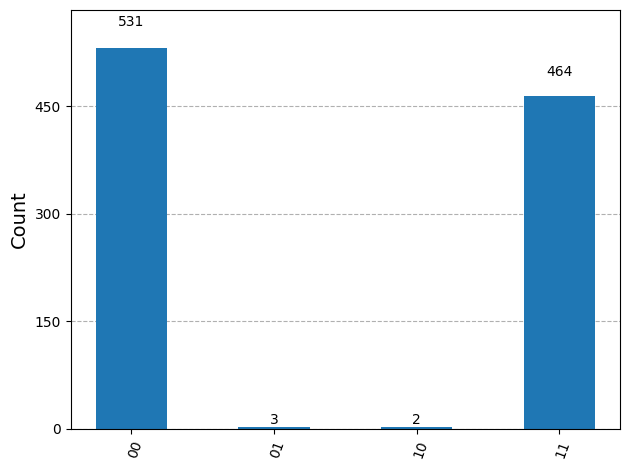

In [51]:
plot_histogram(counts)

# Fifth experiment: Measuring different observables

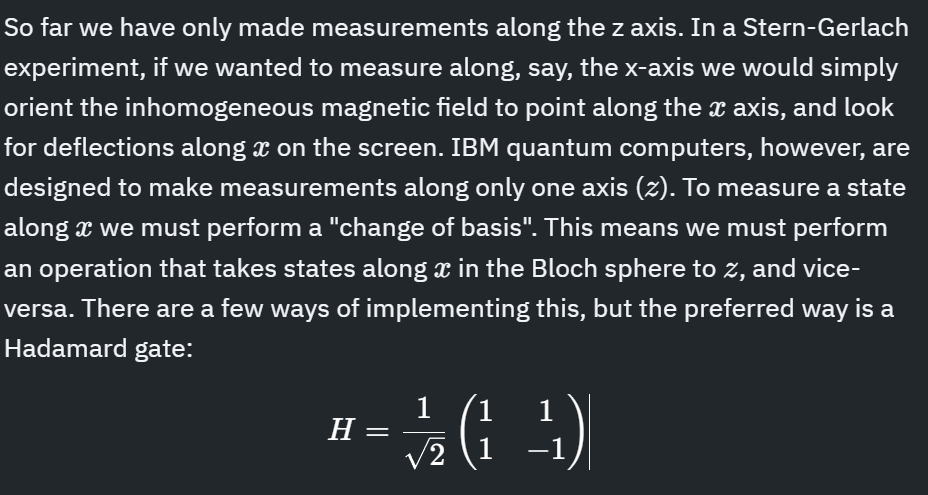

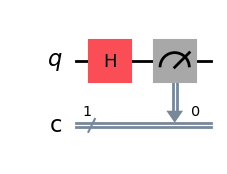

In [53]:
#This circuit rotates our system so that measurements (along z) tell us about the x characteristics prior to the rotation.
qr=QuantumRegister(1,'q')
cr=ClassicalRegister(1,'c')
qc=QuantumCircuit(qr,cr)

qc.h(0)
qc.measure(0,0)

qc.draw('mpl')

In [54]:
#Let's see what happens when we measure the projection of spin along x for a state initially in ket 0.
from qiskit.primitives import StatevectorSampler as Sampler
 
sampler_sv = Sampler()
 
job = sampler_sv.run([qc], shots=10000)
print(job.result()[0].data.c.get_counts())

{'1': 4889, '0': 5111}


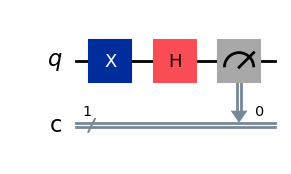

In [55]:
# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)
 
# Add a NOT gate and hadamard gate. Measure.
qc.x(0)
qc.h(0)
qc.measure(0, 0)
 
qc.draw("mpl")

In [56]:
job = sampler_sv.run([qc], shots=10000)
print(job.result()[0].data.c.get_counts())

{'1': 4936, '0': 5064}


In analogy with measurements along z, we might further suspect that a particle that collapses into a state definitely along +x might have zero probability of subsequently being measured along −x. Let's check:

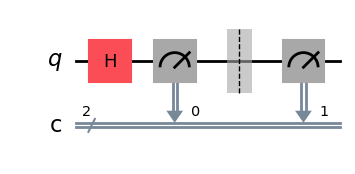

In [62]:
from qiskit import QuantumCircuit
 
# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)
 
# Rotate into x-basis using a Hadamard gate, then make two measurements in succession

qc.h(0)
qc.measure(0, 0)
qc.barrier()
qc.measure(0, 1)
 
qc.draw("mpl")

{'11': 510, '00': 514}


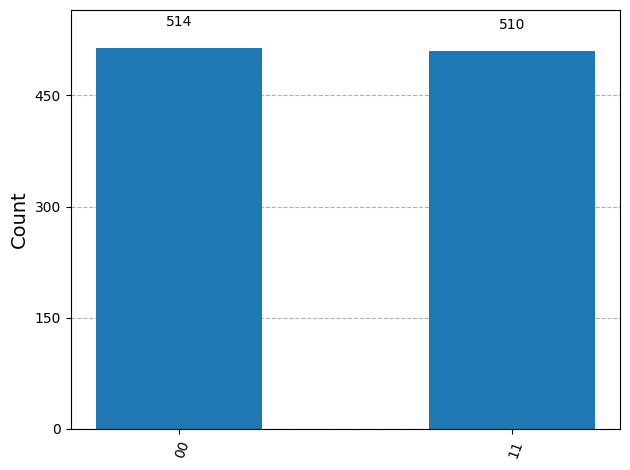

In [61]:
job = sampler_sv.run([qc])
print(job.result()[0].data.c.get_counts())
plot_histogram(job.result()[0].data.c.get_counts())